In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.16249648,  0.27169962],
       [-2.59120504,  0.44842567],
       [ 0.66922198,  0.45198637],
       ...,
       [-0.23315709,  1.7229686 ],
       [-0.51289014,  0.56775504],
       [-0.40327378,  0.65825598]])

In [5]:
y

array([ 1.03471372e+01, -8.82793664e+01,  3.45007287e+01,  1.04386205e+02,
       -3.99035503e+01, -2.45639174e+01, -1.23479114e+02, -5.00215433e+01,
       -8.00777763e+00, -1.72467603e+01, -2.40030130e+01,  4.32320542e+01,
        1.20701584e+01, -4.91920206e+01,  1.08552147e+01, -4.91193381e+00,
       -2.50223511e+01, -2.01889896e+01,  1.20175364e+00, -9.21709700e+01,
        1.20702444e+01, -1.23429429e+00, -6.93527036e+01, -9.37833370e+01,
        5.89253804e+01,  7.38599221e+01, -2.92145885e+01, -1.50741271e+01,
        6.01805269e+01,  3.35939423e+01,  2.38309382e+01,  7.97258460e+01,
        8.65947624e+01,  4.17510686e+01,  2.62949937e+01, -1.07580405e+01,
       -6.34159044e+01,  4.01913817e+01, -8.52054230e+00,  1.07145389e+01,
       -1.93993860e+01, -2.97820002e+01, -6.00188968e+01, -6.90747865e+01,
        2.71457817e+00, -2.93417562e+01,  3.54642023e+01,  1.25632552e+01,
       -2.41821268e+00,  1.31500945e+01, -1.31320450e+01, -4.89132783e+01,
        2.52802483e+01, -

In [6]:
pd.DataFrame(X)[0]

0      0.162496
1     -2.591205
2      0.669222
3      2.301991
4     -0.439229
         ...   
995   -0.550732
996   -0.954424
997   -0.233157
998   -0.512890
999   -0.403274
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

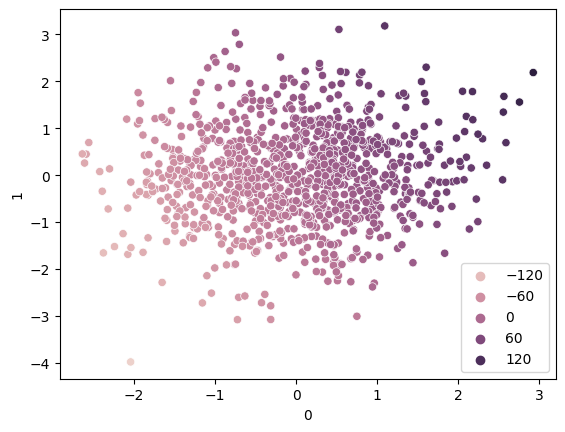

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [12]:
svr=SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[39.64578601, 17.08591566]])

In [14]:
## Prediction
y_pred=svr.predict(X_test)

In [15]:
y_pred

array([  19.86608643,   -2.21084413,   72.43922166,   -2.47975073,
        -65.10688491,  -22.96157285,   47.62389179,  -26.57295308,
         44.63125709,   -1.02135322,  -19.54075112,   13.14719923,
         71.32683193,  -63.19203732,  -74.08264352,   90.02395254,
         28.29202422,   24.31324914,  -61.46118738,  -22.15752579,
        -25.1256702 , -148.85588876,    6.20093902,   62.84491941,
         61.95308155,  -24.46736667,  -17.48527596,  -34.13166827,
          2.98723136,  -50.28941608,   15.72383506,   42.36395449,
        -29.49818972,   -2.11965718,   49.41725014,  -14.68344951,
         46.1278688 , -105.84578021,  -13.32474512,  -52.45878456,
         32.03069527,   -3.82824379,   45.61992905,   11.6305397 ,
        -10.17056809,  -22.9216817 ,  -69.80153973,   -9.11273106,
        -47.16809521,   -9.11352677,  -13.89377276,  -10.80452637,
         49.07278976,  -16.35483427,  -14.06026186,  -24.72186047,
        -71.37467201,  -23.06075622,  -33.44779278,  -70.83412

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_test,y_pred))

0.9960234441339169


In [18]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [19]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.995 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.995 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.995 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/

[CV 4/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.995 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.995 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.996 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.995 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.995 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.996 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.995 total time=   0.

[CV 5/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.995 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.995 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/

[CV 4/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.995 total time=   0.5s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.996 total time=   0.4s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.995 total time=   0.6s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.996 total time=   0.5s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.996 total time=   0.5s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.995 total time=   0.5s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.996 total time=   0.5s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.995 total time=   0.5s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.5s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.5s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=line

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [22]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9960906187583356
